In [13]:
from google.colab import drive

In [14]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
cd drive/MyDrive/Assignments

[Errno 2] No such file or directory: 'drive/MyDrive/Assignments'
/content/drive/MyDrive/Assignments


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,MinMaxScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns

In [68]:
data=pd.read_csv("wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [71]:
features=data.iloc[:,1:]

In [80]:
scale=MinMaxScaler()
features1=scale.fit_transform(features)
features1

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [82]:
pca=PCA()
new_feature=pca.fit_transform(features1)
new_feature

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [83]:
np.round(pca.explained_variance_ratio_,2)

array([0.41, 0.19, 0.09, 0.07, 0.06, 0.05, 0.04, 0.02, 0.02, 0.02, 0.01,
       0.01, 0.01])

In [85]:
x_train,x_test,y_train,y_test=train_test_split(new_feature[:,:1],data['Type'],test_size=0.2,random_state=10)

In [86]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        10
           2       1.00      0.56      0.71        18
           3       0.67      1.00      0.80         8

    accuracy                           0.78        36
   macro avg       0.79      0.85      0.78        36
weighted avg       0.85      0.78      0.77        36



plotting

In [88]:
encoded_data=LabelEncoder().fit_transform(data['Type'])
encoded_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

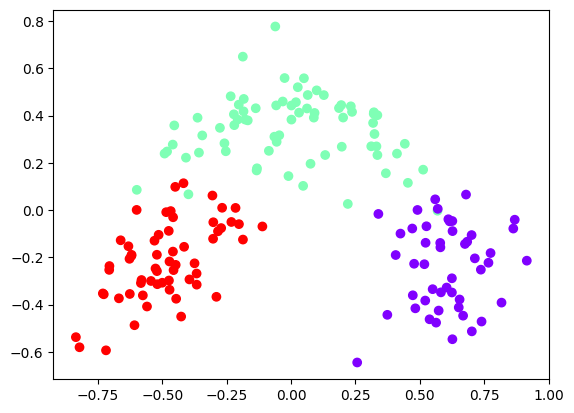

In [94]:
plt.scatter(new_feature[:,0],new_feature[:,1],c=encoded_data,cmap=plt.cm.rainbow_r)

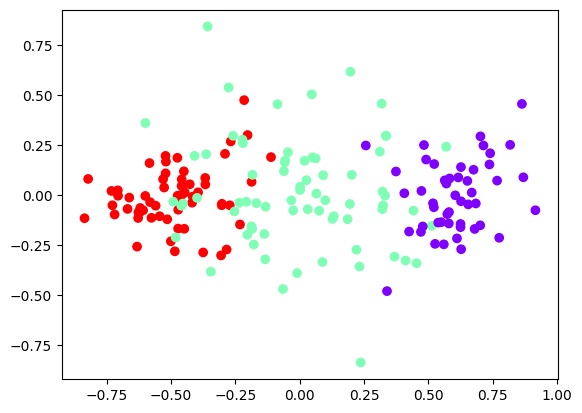

In [95]:
plt.scatter(new_feature[:,0],new_feature[:,2],c=encoded_data,cmap=plt.cm.rainbow_r)

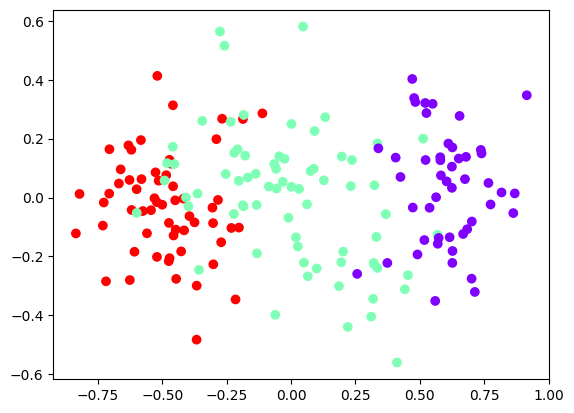

In [96]:
plt.scatter(new_feature[:,0],new_feature[:,3],c=encoded_data,cmap=plt.cm.rainbow_r)